# Pandas

Pandas is an open source library providing **high-performance, easy-to-use data structures and data analysis tools** for the Python programming language. The main idea behind this library is a **table**, which pandas calls a **`DataFrame`**. Pandas allows you to handle data in a way that is much more intuitive than other softwares, like MATLAB. Think of it as an Excel spreadsheet, which has named lines and columns. For those who used "R" before, pandas is to python as `dplyr` is to "R". Pandas also allows for very **basic data visualization**. 

The development of this library began in 2008 at [AQR Capital Management](https://www.aqr.com/). In 2009 the library was open sourced.

If you are looking for a quick tutorial have a look at the [pandas cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html) or, if want to go deep in the details (and you should), here is the [official documentation](https://pandas.pydata.org/pandas-docs/stable/index.html). Scroll through the index and see what interests you (there is a friendly PDF version which has 2600 pages!!!).

**Obs**: the name "pandas" comes from "**Pan**el **Da**ta **S**tructure", which was the original purpose of the library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # ignore this line for now

---
# The `Series` Object
You can think of a `Series` as a "named sequence of indexed values".

In [2]:
my_series = pd.Series(index=['John', 'George', 'Paul', 'Ringo'], data=[1940, 1943, 1942, 1940], name='Birth Year')
my_series   # We can make this code a little prettier

John      1940
George    1943
Paul      1942
Ringo     1940
Name: Birth Year, dtype: int64

In [3]:
type(my_series)

pandas.core.series.Series

We can access the values inside of the series by their index with different methods

In [4]:
my_series.loc['Paul']  # here 'loc' means 'location'

1942

In [5]:
my_series.iloc[2]  # 'iloc' allows you to treat the series as a MATLAB object...

1942

In [6]:
my_series.iloc[-2]  # ... but with a few different twists

1942

In practice, a pandas `Series` holds a **single variable**. If we want to handle several variables at once, we need a different type of object...

---
# The `DataFrame` Object

Think of a `DataFrame` as a collection of several `Series`.

A `DataFrame` has three ingredients: `index` (observation identifier), `columns` (variable/`Series` identifier) and `data`.

The cell below creates a `DataFrame` with two `Series`, the first one called "Birth Year" and the second one called "Height".

In [7]:
my_df = pd.DataFrame(columns=['Birth Year', 'Height'], 
                     index=['John', 'George', 'Paul', 'Ringo'],
                     data=[[1940, 1.78], 
                           [1943, 1.78], 
                           [1942, 1.76], 
                           [1940, 1.68]])
my_df

,Birth Year,Height
John,1940,1.78
George,1943,1.78
Paul,1942,1.76
Ringo,1940,1.68


In [8]:
type(my_df)

pandas.core.frame.DataFrame

There are other ways to declare a `DataFrame` that might be useful. For example, you can pass a `dict` variable to the `data` atribute, where the keys of the dictionary are the names of the variables.

In [9]:
data_dict = {'Birth Year': [1940, 1943, 1942, 1940],
             'Height': [1.78, 1.78, 1.76, 1.68]}

index_list = ['John', 'George', 'Paul', 'Ringo']

my_df = pd.DataFrame(data=data_dict, 
                     index=index_list)

my_df

,Birth Year,Height
John,1940,1.78
George,1943,1.78
Paul,1942,1.76
Ringo,1940,1.68


Now that we have our `DataFrame` we can access **variables** (columns/`Series`) using their column name or access the **observation** (line/index) using the `.loc[]` atribute.

In [10]:
my_df['Height']

John      1.78
George    1.78
Paul      1.76
Ringo     1.68
Name: Height, dtype: float64

In [11]:
my_df.loc['Ringo']

Birth Year    1940.00
Height           1.68
Name: Ringo, dtype: float64

A specific value can be acessed in three ways. Either by giving the column/index names or by explicitly giving the position on the dataframe using the `.iloc[]` atribute (Although you can access values by their positions, this is not considered good practice for programming).

In [12]:
my_df['Height']['Ringo']

1.68

In [13]:
my_df.loc['Ringo', 'Height']

1.68

In [14]:
my_df.iloc[3, 1]  # Treats the DataFrame as a matrix. It's not considered good practice, but it's possible.

1.68

Now that we know the basics, lets work with a real data set.

---

# Reading Data From an Excel Spreadsheet
On the example below we are going to use data from ENEM 2015.

In [15]:
enem_df = pd.read_excel("data/Planilhas_Enem_2015_download.xlsx", skiprows=2)

## Data Exploration
What is the size of this DataFrame?

In [16]:
enem_df.shape

(15598, 25)

What are the variables (columns) in this dataset?

In [17]:
enem_df.columns

Index(['CÓDIGO DA ENTIDADE', 'NOME DA ENTIDADE', 'SIGLA DA UF',
       'NOME MUNICÍPIO', 'DEPENDÊNCIA ADMINISTRATIVA', 'LOCALIZACAO',
       'NÚMERO DE ALUNOS NO CENSO', 'PORTE DA ESCOLA',
       'NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA', 'TAXA DE PARTICIPAÇÃO',
       'NÚMERO DE PARTICIPANTES COM NECESSIDADES ESPECIAIS',
       'INDICADOR DE PERMANÊNCIA NA ESCOLA',
       'INDICADOR DE NÍVEL SÓCIOECONOMICO',
       'FAIXA - INDICADOR DE FORMAÇÃO DOCENTE',
       'INDICADOR DE FORMAÇÃO DOCENTE', 'TAXA DE APROVAÇÃO',
       'TAXA DE REPROVAÇÃO', 'TAXA DE ABANDONO',
       'MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA', 'MÉDIA ESCOLA',
       'Percentual alunos NÍVEL 1', 'Percentual alunos NÍVEL 2',
       'Percentual alunos NÍVEL 3', 'Percentual alunos NÍVEL 4',
       'Percentual alunos NÍVEL 5'],
      dtype='object')

If you need to look at the contents of the `DataFrame`, but not all it, use the `.head()`, `.tail()` or `.sample()` method.

In [18]:
enem_df.head()

,CÓDIGO DA ENTIDADE,NOME DA ENTIDADE,SIGLA DA UF,NOME MUNICÍPIO,DEPENDÊNCIA ADMINISTRATIVA,LOCALIZACAO,NÚMERO DE ALUNOS NO CENSO,PORTE DA ESCOLA,NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA,TAXA DE PARTICIPAÇÃO,...,TAXA DE APROVAÇÃO,TAXA DE REPROVAÇÃO,TAXA DE ABANDONO,MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA,MÉDIA ESCOLA,Percentual alunos NÍVEL 1,Percentual alunos NÍVEL 2,Percentual alunos NÍVEL 3,Percentual alunos NÍVEL 4,Percentual alunos NÍVEL 5
0,11000058,CENTRO DE ENSINO CLASSE A,RO,Porto Velho,Privada,Urbana,137,Maior que 90 alunos,130,94.890511,...,96.1,3.9,0.0,701.669983,652.343872,0.000000,0.000000,43.846153,55.384617,0.769231
1,11000171,CENTRO EDUCACIONAL MOJUCA,RO,Porto Velho,Privada,Urbana,20,De 1 a 30 alunos,17,85.000000,...,94.6,5.4,0.0,NaN,533.511780,17.647058,23.529411,58.823532,0.000000,0.000000
2,11000198,CENTRO EDUCACIONAL OBJETIVO,RO,Porto Velho,Privada,Urbana,39,De 31 a 60 alunos,37,94.871796,...,90.1,9.9,0.0,609.336670,583.872986,5.405406,10.810811,78.378380,5.405406,0.000000
3,11000244,COLEGIO DOM BOSCO,RO,Porto Velho,Privada,Urbana,55,De 31 a 60 alunos,49,89.090904,...,88.7,10.5,0.8,628.010010,586.446960,4.081633,16.326530,69.387756,10.204082,0.000000
4,11000252,CENTRO EDUCACIONAL OBJETIVO - UNIDADE JARDIM A...,RO,Porto Velho,Privada,Urbana,26,De 1 a 30 alunos,23,88.461533,...,84.5,13.1,2.4,NaN,591.656494,4.347826,13.043478,73.913040,8.695652,0.000000


Pandas has a quick way to describe quantitative variables.

In [19]:
enem_df.describe()

,CÓDIGO DA ENTIDADE,NÚMERO DE ALUNOS NO CENSO,NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA,TAXA DE PARTICIPAÇÃO,NÚMERO DE PARTICIPANTES COM NECESSIDADES ESPECIAIS,INDICADOR DE FORMAÇÃO DOCENTE,TAXA DE APROVAÇÃO,TAXA DE REPROVAÇÃO,TAXA DE ABANDONO,MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA,MÉDIA ESCOLA,Percentual alunos NÍVEL 1,Percentual alunos NÍVEL 2,Percentual alunos NÍVEL 3,Percentual alunos NÍVEL 4,Percentual alunos NÍVEL 5
count,1.559800e+04,15598.000000,15598.00000,15598.000000,15598.000000,15579.000000,15516.000000,15516.000000,15516.000000,9997.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000
mean,3.327456e+07,85.465765,62.53026,76.143429,0.553533,60.393125,87.416177,8.798079,3.785744,613.331686,566.760256,6.958523,30.390330,51.613227,10.888436,0.149486
std,9.260374e+06,83.905615,61.90255,15.382799,1.325878,17.222157,10.952789,7.915180,5.557789,41.549792,40.158753,6.860939,17.062041,14.666852,15.157748,0.820992
min,1.100006e+07,10.000000,10.00000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,482.896667,456.179993,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.704255e+07,29.000000,23.00000,62.195122,0.000000,49.600000,80.800000,2.800000,0.000000,585.380005,537.071121,0.000000,16.279070,41.666664,0.000000,0.000000
50%,3.309012e+07,57.000000,42.00000,76.923080,0.000000,61.900000,90.500000,6.700000,0.900000,610.890015,558.930023,5.714286,32.258064,52.499996,4.545455,0.000000
75%,3.592451e+07,112.000000,80.00000,90.322578,1.000000,73.000000,96.200000,12.700000,6.000000,638.326660,594.309204,10.526316,43.478260,61.855667,15.000001,0.000000
max,5.308200e+07,842.000000,716.00000,100.000000,27.000000,100.000000,100.000000,60.200000,85.700000,772.946655,721.468323,50.000000,90.909096,100.000000,97.142860,17.073172


Notice that the output of the `.describe()` method is also a `DataFrame`. Which means we access its values as well.

In [20]:
my_query = enem_df.describe()
my_query['MÉDIA ESCOLA']['max']

721.4683227539062

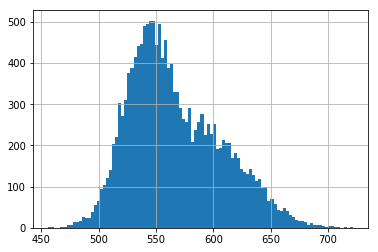

In [21]:
enem_df['MÉDIA ESCOLA'].hist(bins=100)  # try "bins"

## Selections / Filters

In [22]:
enem_df['DEPENDÊNCIA ADMINISTRATIVA']

0         Privada
1         Privada
2         Privada
3         Privada
4         Privada
5        Estadual
6        Estadual
7         Privada
8        Estadual
9        Estadual
10       Estadual
11       Estadual
12       Estadual
13       Estadual
14        Privada
15       Estadual
16       Estadual
17       Estadual
18       Estadual
19       Estadual
20       Estadual
21       Estadual
22       Estadual
23       Estadual
24       Estadual
25       Estadual
26       Estadual
27       Estadual
28       Estadual
29       Estadual
           ...   
15568     Privada
15569    Estadual
15570    Estadual
15571     Privada
15572     Privada
15573     Privada
15574     Privada
15575    Estadual
15576     Privada
15577     Privada
15578     Privada
15579     Privada
15580     Privada
15581     Privada
15582     Privada
15583    Estadual
15584    Estadual
15585     Privada
15586     Privada
15587     Privada
15588     Privada
15589     Privada
15590    Estadual
15591    Estadual
15592     

In [23]:
enem_df['DEPENDÊNCIA ADMINISTRATIVA'] == 'Privada'

0         True
1         True
2         True
3         True
4         True
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15568     True
15569    False
15570    False
15571     True
15572     True
15573     True
15574     True
15575    False
15576     True
15577     True
15578     True
15579     True
15580     True
15581     True
15582     True
15583    False
15584    False
15585     True
15586     True
15587     True
15588     True
15589     True
15590    False
15591    False
15592     True
15593     True
15594    False
15595    False
15596    False
15597     True
Name: DEPENDÊNCIA ADMINISTRATIVA, Length: 15598, dtype: bool

In [24]:
is_private = enem_df['DEPENDÊNCIA ADMINISTRATIVA'] == 'Privada'  # 'True' for private schools
in_CE = enem_df['SIGLA DA UF'] == 'CE'  # 'True' for schools in CE
enem_df[is_private & in_CE]

,CÓDIGO DA ENTIDADE,NOME DA ENTIDADE,SIGLA DA UF,NOME MUNICÍPIO,DEPENDÊNCIA ADMINISTRATIVA,LOCALIZACAO,NÚMERO DE ALUNOS NO CENSO,PORTE DA ESCOLA,NÚMERO DE PARTICIPANTES NO ENEM POR ESCOLA,TAXA DE PARTICIPAÇÃO,...,TAXA DE APROVAÇÃO,TAXA DE REPROVAÇÃO,TAXA DE ABANDONO,MÉDIA DOS 30 MELHORES ALUNOS DA ESCOLA,MÉDIA ESCOLA,Percentual alunos NÍVEL 1,Percentual alunos NÍVEL 2,Percentual alunos NÍVEL 3,Percentual alunos NÍVEL 4,Percentual alunos NÍVEL 5
1660,23000872,VIRGEM PODEROSA ESC,CE,Acaraú,Privada,Urbana,32,De 31 a 60 alunos,29,90.625000,...,96.1,1.9,2.0,NaN,566.965515,13.793103,17.241379,55.172413,13.793103,0.000000
1662,23001895,IMACULADA CONCEICAO INSTITUTO,CE,Bela Cruz,Privada,Urbana,18,De 1 a 30 alunos,16,88.888893,...,97.9,2.1,0.0,NaN,592.918762,0.000000,31.250000,50.000000,18.750000,0.000000
1668,23005017,CENTRO DE EDUCACAO BASICA JOSE INACIO,CE,Granja,Privada,Urbana,14,De 1 a 30 alunos,13,92.857140,...,100.0,0.0,0.0,NaN,594.092285,0.000000,23.076923,53.846157,23.076923,0.000000
1673,23007486,CENTRO EDUCACIONAL CENECISTA SAO MANUEL,CE,Marco,Privada,Urbana,34,De 31 a 60 alunos,24,70.588234,...,99.1,0.9,0.0,NaN,546.916687,8.333334,50.000000,33.333336,8.333334,0.000000
1678,23009594,BENJAMIN SOARES INSTITUTO,CE,Guaraciaba do Norte,Privada,Urbana,29,De 1 a 30 alunos,26,89.655174,...,97.6,2.4,0.0,NaN,570.496155,3.846154,26.923079,57.692307,11.538462,0.000000
1681,23010673,ESCOLA PROFISSIONAL MONSENHOR MELO,CE,Ibiapina,Privada,Urbana,30,De 1 a 30 alunos,28,93.333336,...,100.0,0.0,0.0,NaN,587.096436,10.714286,10.714286,53.571426,25.000000,0.000000
1685,23011696,CENTRO EDUCACIONAL VIRGEM PODEROSA,CE,São Benedito,Privada,Urbana,11,De 1 a 30 alunos,11,100.000000,...,98.4,1.6,0.0,NaN,597.245483,0.000000,18.181818,54.545456,27.272728,0.000000
1691,23013761,PATRONATO TENENTE ANGELO DE SIQUEIRA PASSOS EEF,CE,Viçosa do Ceará,Privada,Urbana,15,De 1 a 30 alunos,12,80.000000,...,98.3,1.7,0.0,NaN,595.016663,0.000000,25.000000,50.000000,25.000000,0.000000
1705,23021152,CENTRO EDUCACIONAL CENECISTA MASSAPEENSE,CE,Massapê,Privada,Urbana,24,De 1 a 30 alunos,18,75.000000,...,100.0,0.0,0.0,NaN,573.849976,0.000000,22.222223,72.222221,5.555556,0.000000
1713,23024585,SANTO ANTONIO CENTRO DE EDUCACAO,CE,Sobral,Privada,Urbana,22,De 1 a 30 alunos,17,77.272728,...,92.8,5.8,1.4,NaN,557.099976,17.647058,17.647058,52.941177,11.764706,0.000000


You can query based on partial matches

In [25]:
enem_df['NOME DA ENTIDADE'].str.contains('NOSSA SENHORA')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15568    False
15569    False
15570    False
15571    False
15572    False
15573    False
15574    False
15575    False
15576    False
15577    False
15578    False
15579    False
15580    False
15581    False
15582    False
15583    False
15584    False
15585    False
15586    False
15587    False
15588    False
15589    False
15590    False
15591    False
15592    False
15593    False
15594    False
15595    False
15596    False
15597    False
Name: NOME DA ENTIDADE, Length: 15598, dtype: bool

You can impose a filter and then select only the columns that you want to see.

In [26]:
name_filter = enem_df['NOME DA ENTIDADE'].str.contains('NOSSA SENHORA')
enem_df[name_filter][['NOME DA ENTIDADE', 'MÉDIA ESCOLA', 'SIGLA DA UF']]

,NOME DA ENTIDADE,MÉDIA ESCOLA,SIGLA DA UF
228,ESCOLA ESTADUAL NOSSA SENHORA DO PERPETUO SOCORRO,515.818115,AM
235,ESCOLA ESTADUAL NOSSA SENHORA DE NAZARE,514.584473,AM
294,ESCOLA ESTADUAL NOSSA SENHORA APARECIDA,525.207886,AM
317,COLEGIO NOSSA SENHORA DO CARMO,548.273193,AM
341,COLEGIO NOSSA SENHORA DO ROSARIO,618.458313,AM
431,EEEFM NOSSA SENHORA APARECIDA,528.549988,PA
465,COLEGIO MARISTA NOSSA SENHORA DE NAZARE,652.287903,PA
467,COLEGIO SALESIANO NOSSA SENHORA DO CARMO,601.158325,PA
539,INSTITUTO NOSSA SENHORA AUXILIADORA,578.701599,PA
843,COLEGIO NOSSA SENHORA DA CONCEICAO,505.708099,TO


## Chaining Commands
***Question***: What are the five states with the highest average score? What are their abandon rate?

In [27]:
enem_df.groupby('SIGLA DA UF').mean()[['MÉDIA ESCOLA', 'TAXA DE ABANDONO']].sort_values('MÉDIA ESCOLA', ascending=False).head(5)

,MÉDIA ESCOLA,TAXA DE ABANDONO
SIGLA DA UF,,
DF,581.789785,2.264706
SP,580.943350,0.989546
RJ,578.954951,1.809019
PR,578.502434,3.380709
MG,575.391745,4.278313


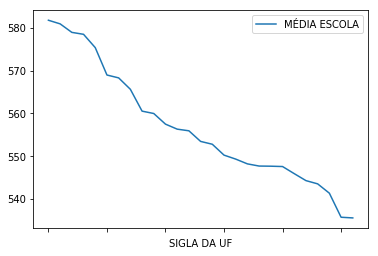

In [28]:
result = enem_df.groupby('SIGLA DA UF').mean()[['MÉDIA ESCOLA']].sort_values('MÉDIA ESCOLA', ascending=False)
result.plot()  # kind='bar', figsize=(15,6), ylim=[530, 585]

## Coutning with Crosstabs

In [29]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'])

DEPENDÊNCIA ADMINISTRATIVA,Estadual,Federal,Municipal,Privada
LOCALIZACAO,,,,
Rural,444,58,11,52
Urbana,8392,270,98,6273


In [30]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'], margins=True)

DEPENDÊNCIA ADMINISTRATIVA,Estadual,Federal,Municipal,Privada,All
LOCALIZACAO,,,,,
Rural,444,58,11,52,565
Urbana,8392,270,98,6273,15033
All,8836,328,109,6325,15598


In [31]:
pd.crosstab(enem_df['LOCALIZACAO'], enem_df['DEPENDÊNCIA ADMINISTRATIVA'], margins=True, normalize='all')

DEPENDÊNCIA ADMINISTRATIVA,Estadual,Federal,Municipal,Privada,All
LOCALIZACAO,,,,,
Rural,0.028465,0.003718,0.000705,0.003334,0.036223
Urbana,0.538018,0.017310,0.006283,0.402167,0.963777
All,0.566483,0.021028,0.006988,0.405501,1.000000


## Pivot Tables
This functionality works exactly as the pivot table from MS Excel or MS Access.

In [32]:
pd.pivot_table(enem_df, values='MÉDIA ESCOLA', index='DEPENDÊNCIA ADMINISTRATIVA', columns='LOCALIZACAO', aggfunc=np.mean)

LOCALIZACAO,Rural,Urbana
DEPENDÊNCIA ADMINISTRATIVA,,
Estadual,532.792549,542.444808
Federal,586.207176,610.964768
Municipal,542.821089,567.124659
Privada,562.328246,599.684193


you can use multiple variables on the index.

In [33]:
pd.pivot_table(enem_df, values='MÉDIA ESCOLA', index=['DEPENDÊNCIA ADMINISTRATIVA', 'LOCALIZACAO'], columns='SIGLA DA UF', aggfunc=np.mean)


SIGLA DA UF                                     AC          AL          AM  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        520.129300  523.582676  512.592056   
                           Urbana       528.501683  519.231654  526.388384   
Federal                    Rural               NaN         NaN         NaN   
                           Urbana       573.785339  581.340369  575.787518   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana              NaN         NaN         NaN   
Privada                    Rural               NaN         NaN  566.671570   
                           Urbana       597.886569  564.427489  596.130045   

SIGLA DA UF                                     AP          BA          CE  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        515.926651  525.806266  507.930531   
                           Urbana       522.480068  537.090023  525.098222   
Federal                    Rural               NaN  597.007660  561.570496   
                           Urbana       588.540710  602.308037  602.126241   
Municipal                  Rural               NaN  526.604202         NaN   
                           Urbana              NaN  530.069839         NaN   
Privada                    Rural               NaN  553.395081  572.035278   
                           Urbana       582.782443  600.830483  590.783997   

SIGLA DA UF                                     DF          ES          GO  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        543.787048  531.290038  519.145277   
                           Urbana       552.489709  540.255695  533.370924   
Federal                    Rural        558.597473  607.191569  586.175323   
                           Urbana       634.505859  624.629344  617.771479   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana              NaN         NaN  578.044403   
Privada                    Rural        559.124023  536.731247  552.036514   
                           Urbana       605.874754  607.202893  593.403552   

SIGLA DA UF                                     MA     ...              PR  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                 ...                   
Estadual                   Rural        510.256012     ...      550.645532   
                           Urbana       521.865679     ...      557.360858   
Federal                    Rural        569.754126     ...             NaN   
                           Urbana       590.330225     ...      623.760735   
Municipal                  Rural               NaN     ...             NaN   
                           Urbana       562.584595     ...             NaN   
Privada                    Rural        553.849426     ...      577.761129   
                           Urbana       571.168155     ...      601.823730   

SIGLA DA UF                                     RJ          RN          RO  \
DEPENDÊNCIA ADMINISTRATIVA LOCALIZACAO                                       
Estadual                   Rural        550.661081  506.978966  526.591256   
                           Urbana       547.809751  527.284401  540.312786   
Federal                    Rural        652.201660  599.847382  586.055664   
                           Urbana       639.494857  608.410743  595.089874   
Municipal                  Rural               NaN         NaN         NaN   
                           Urbana       577.517807         NaN         NaN   
Privada                    Rural        587.586975         NaN  542.424998   
                           Urbana       602.420906  582.869260  587.272841   

SIGLA DA UF                                     RR          RS          SC  \
DEPENDÊNCIA ADMIN

Notice that the output above is itself a `DataFrame` with a 2-column index. This is a multi-index `DataFrame` (which is basically a panel).

---
# Practical Example - Fecth Data from the Brazilian Central Bank (BCB)
If you find a good source of data and they happen to have a **data API**, it is very easy to build a function that fetches the data. In this example, we will make a wrapper for the [data API of the Time Series Management System](https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88) ([Sistema de Gerenciamento de Séries](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries), SGS) of the brazilian central bank.

The data is available in **JSON format** (google it!). The idea is to build a function that receives the Series ID and returns a DataFrame with the series.

In [34]:
df = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.1638/dados?formato=json')
df = df.set_index(pd.to_datetime(df['data'], dayfirst=True)).drop('data', axis='columns')
df.columns = ['IPCA - Clothing']
df

,IPCA - Clothing
data,
1991-01-01,6.20
1991-02-01,6.35
1991-03-01,5.87
1991-04-01,14.08
1991-05-01,15.49
1991-06-01,12.39
1991-07-01,12.89
1991-09-01,30.73
1991-10-01,18.21


In [35]:
def get_SGS_data(series_id, series_name):
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{series_id}/dados?formato=json'
    df = pd.read_json(url)
    df = df.set_index(pd.to_datetime(df['data'], dayfirst=True)).drop('data', axis='columns')
    df.columns = [series_name]
    return df

You could make this function a bit more fancy by adding date filters, allowing to fecth several series at the same time (maybe by passing a list of series IDs). It would be perfect if you turned that into a python library so that everyone can use.

To test our function, let's look at the IBC-Br with seasonal adjustment (Mohtly proxy for the brazilian GDP). Its series ID is 24364.

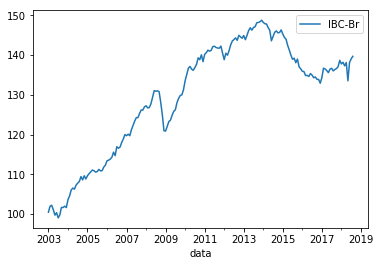

In [36]:
df_IBCbr = get_SGS_data(24364, 'IBC-Br')
df_IBCbr.plot()

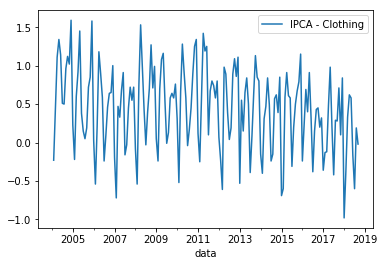

In [37]:
df_ipca = get_SGS_data(1638, 'IPCA - Clothing')
df_ipca = df_ipca[df_ipca.index > '2004-01-01']
df_ipca.plot()

# Pratical Example - Fetch Data from the FRED
We can repeat the exercise but using the data API from the [FRED](https://fred.stlouisfed.org/). Their data API URL requires a bit more work to get a clean result, but thanks to python, its possible to do it in just a few lines. To fully understand the code below you will need to understand a bit more about regular expressions.

In [38]:
def getFRED(ticker, series_name):
    df = pd.read_csv('https://fred.stlouisfed.org/data/' + ticker + '.txt', sep='\n')  # read data from website
    series_start = df[df[df.columns[0]].str.contains('DATE\s+VALUE')].index[0] + 1  # find the line where the series starts using regular expressions
    df = df.loc[series_start:]  # drop header description
    df = df[df.columns[0]].str.split('\s+', expand=True)  # split strings between date and value
    df = pd.DataFrame(data=df[1].values.astype(float), index=pd.to_datetime(df[0]), columns=[series_name])  # clean data
    df.index.rename('Date', inplace=True)
    return df

To test our scrapper, let's look at the american core CPI.

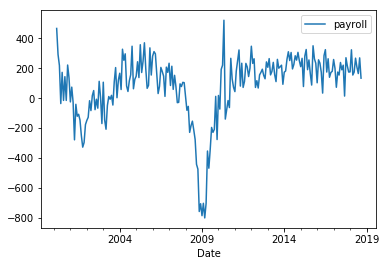

In [39]:
df = getFRED('PAYEMS', 'payroll')  # CPILFESL  PAYEMS
df[df.index > pd.to_datetime('2000-01-01')].diff(1).plot()

# Resampling VS Rolling
There is a difference between a moving average of the last 3 months and a series of quarterly frequency.

In [40]:
df['payroll change'] = df['payroll'].diff(1)
df['payroll change 3m MA'] = df['payroll change'].rolling(3).mean()

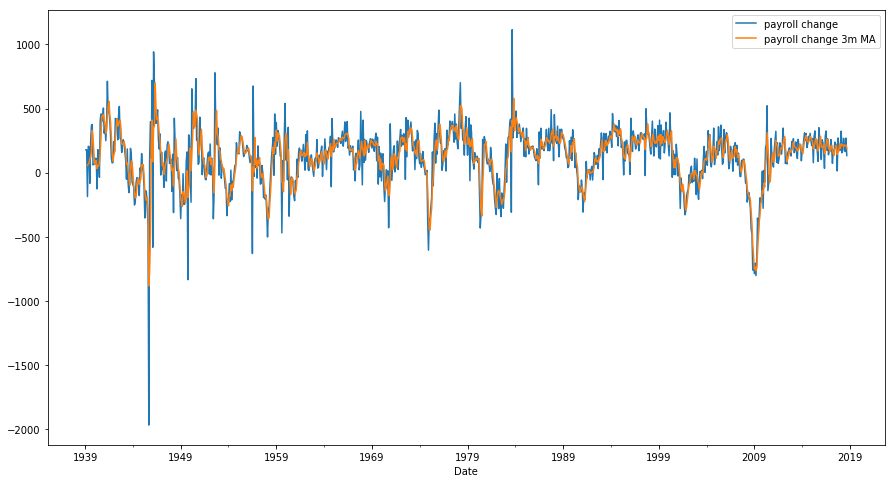

In [41]:
df[['payroll change', 'payroll change 3m MA']].plot(figsize=(15, 8))

The `.resample()` method is different from the `.rolling()` because it changes the frequency of the series. All the resampling aliases are available [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

In [42]:
df['payroll change'].resample('Q').mean()

Date
1939-03-31    178.500000
1939-06-30     74.000000
1939-09-30    176.666667
1939-12-31    169.000000
1940-03-31     95.666667
1940-06-30     50.666667
1940-09-30    277.333333
1940-12-31    454.000000
1941-03-31    307.333333
1941-06-30    519.000000
1941-09-30    394.666667
1941-12-31     89.666667
1942-03-31    277.333333
1942-06-30    364.000000
1942-09-30    409.000000
1942-12-31    220.000000
1943-03-31    212.666667
1943-06-30     76.000000
1943-09-30    -98.666667
1943-12-31     87.000000
1944-03-31   -151.333333
1944-06-30   -115.000000
1944-09-30    -91.666667
1944-12-31     63.000000
1945-03-31    -21.666667
1945-06-30   -215.666667
1945-09-30   -883.000000
1945-12-31    204.000000
1946-03-31    360.333333
1946-06-30    513.333333
                 ...    
2011-06-30    212.666667
2011-09-30    139.000000
2011-12-31    185.000000
2012-03-31    281.666667
2012-06-30     85.666667
2012-09-30    174.333333
2012-12-31    175.333333
2013-03-31    209.333333
2013-06-30    192.33

# Working with financial data

In [43]:
df_stocks = pd.read_excel('data/stocks_portfolio.xlsx', sheet_name='Values', index_col='Dates')
df_stocks.dropna(how='all')
df_stocks

,BBDC4,PETR4,ABEV3,VALE3,ITUB4,SUZB3,LREN3,UGPA3,FIBR3,GGBR4,...,LAME4,TIMP3,CCRO3,BRAP4,MGLU3,BRML3,MULT3,CVCB3,CSNA3,IBOV
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,17.042,36.69,6.973,49.50,26.426,NaN,7.145,20.028,39.09,29.14,...,7.946,7.15,9.973,38.53,NaN,7.191,10.762,NaN,28.000,68588.41
2010-01-04,17.661,37.32,7.097,51.49,27.402,NaN,7.318,20.375,39.30,29.60,...,8.059,7.18,10.025,39.20,NaN,7.224,11.177,NaN,28.105,70045.08
2010-01-05,17.567,37.00,7.067,51.97,27.580,NaN,7.055,20.600,40.80,30.10,...,7.777,7.70,10.163,39.99,NaN,7.358,11.127,NaN,28.365,70239.82
2010-01-06,17.427,37.50,7.098,53.07,27.341,NaN,6.918,20.950,40.71,30.30,...,7.629,7.60,10.500,40.55,NaN,7.692,11.276,NaN,28.400,70729.34
2010-01-07,17.380,37.15,7.077,53.29,27.061,NaN,6.855,20.808,40.38,29.62,...,7.624,7.43,10.403,41.00,NaN,7.592,11.226,NaN,28.100,70451.12
2010-01-08,17.361,36.95,7.093,53.81,26.651,NaN,6.891,20.725,39.50,29.54,...,7.649,7.35,10.400,41.60,NaN,7.525,10.729,NaN,28.735,70262.70
2010-01-11,17.375,36.83,7.063,53.65,26.419,NaN,7.018,21.100,39.65,29.56,...,7.675,7.52,10.500,41.78,NaN,7.395,10.517,NaN,29.300,70433.49
2010-01-12,17.427,36.36,7.153,53.50,26.173,NaN,7.182,21.000,38.23,29.35,...,7.793,7.42,10.500,41.79,NaN,7.318,10.497,NaN,28.755,70075.78
2010-01-13,17.520,36.30,7.268,54.16,26.255,NaN,7.264,20.900,37.50,29.49,...,7.874,7.44,10.350,42.16,NaN,7.308,10.381,NaN,29.250,70385.47


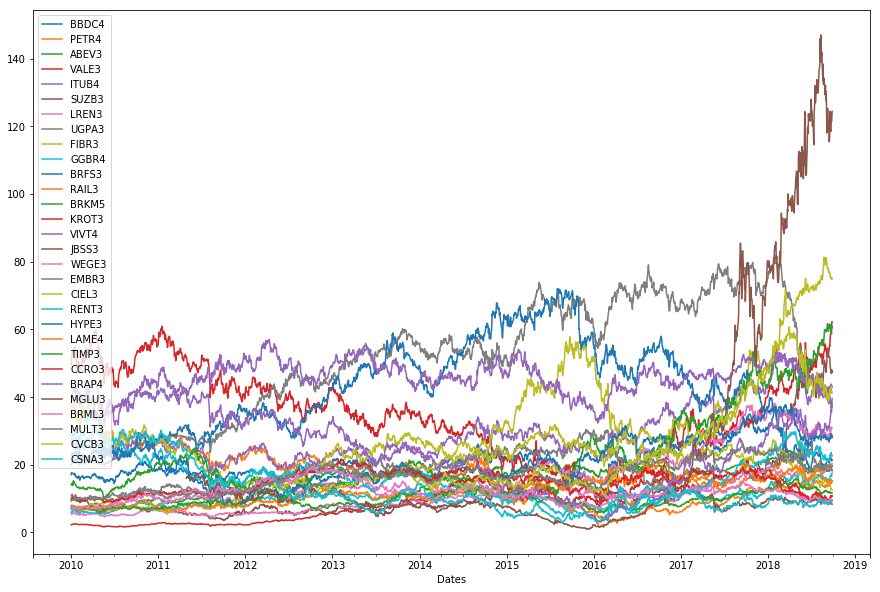

In [44]:
df_stocks[df_stocks.columns[:-1]].plot(figsize=(15,10))

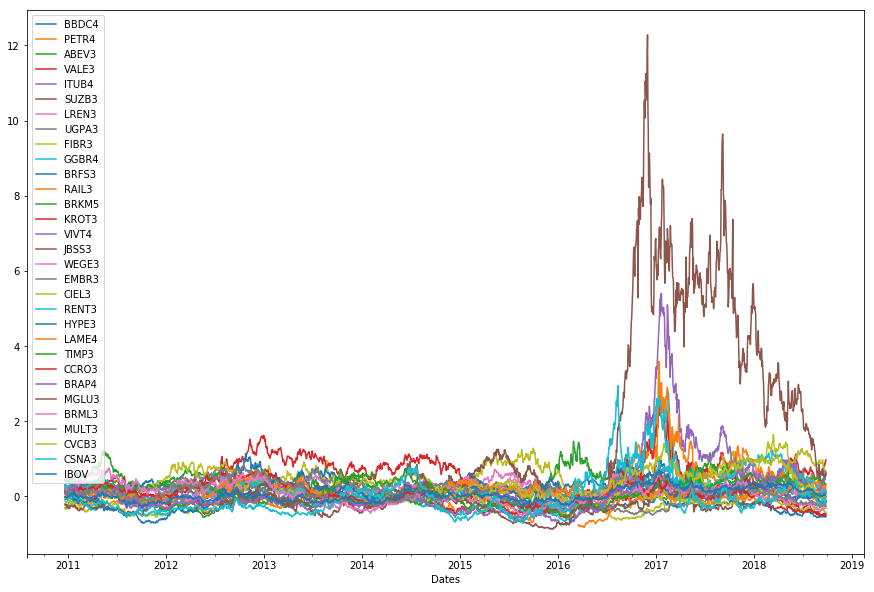

In [45]:
df_returns = df_stocks.pct_change(1)

df_returns_1y = df_stocks.pct_change(252)
df_returns_1y.plot(figsize=(15, 10))

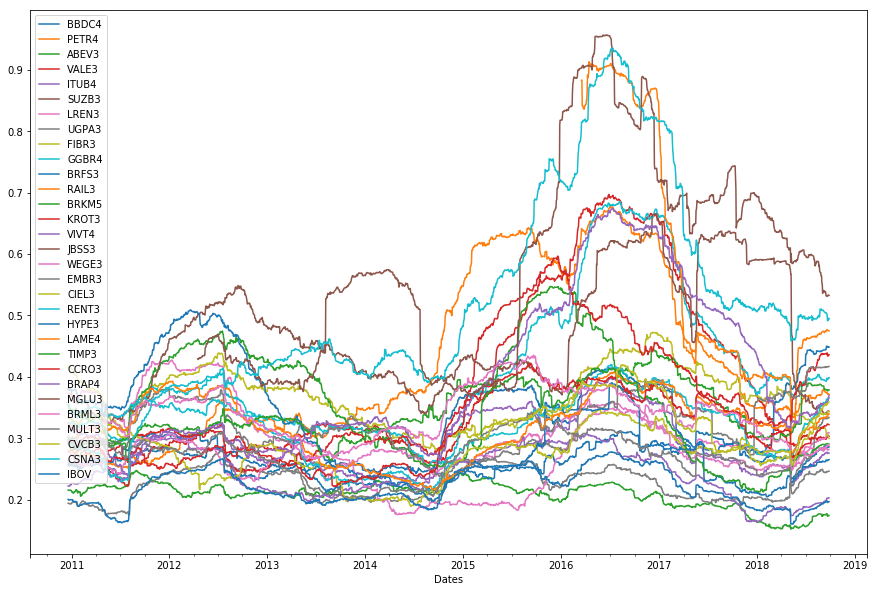

In [46]:
df_vols_1y = df_returns.rolling(252).aggregate(np.std)*np.sqrt(252)
df_vols_1y.plot(figsize=(15, 10))

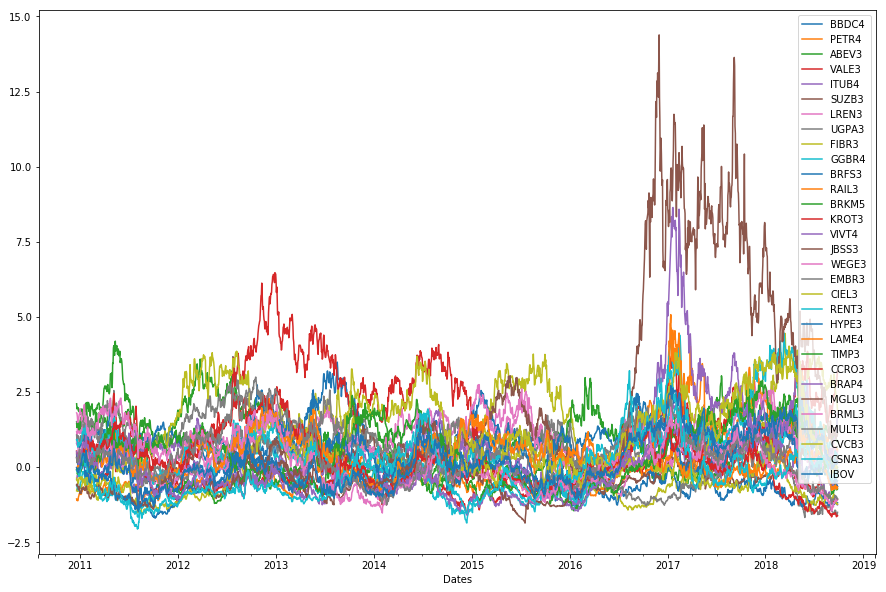

In [47]:
df_sharpe = df_returns_1y/df_vols_1y
df_sharpe.plot(figsize=(15,10))

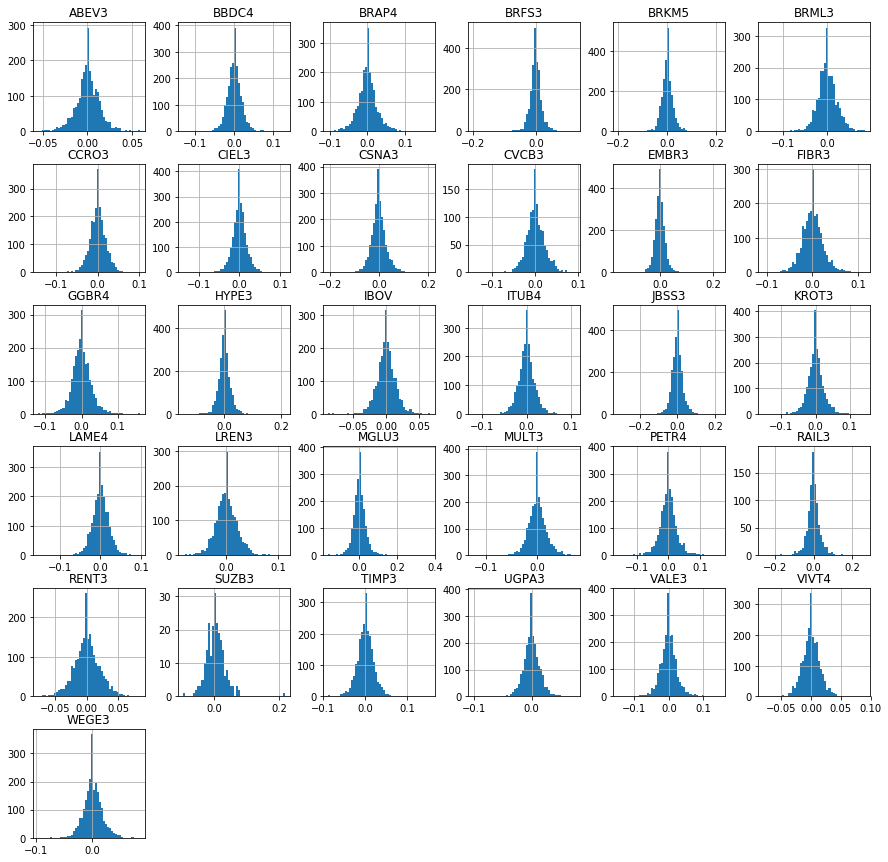

In [48]:
df_returns.hist(figsize=(15,15), bins=50)
plt.show()

In [49]:
df_returns.corr()

,BBDC4,PETR4,ABEV3,VALE3,ITUB4,SUZB3,LREN3,UGPA3,FIBR3,GGBR4,...,LAME4,TIMP3,CCRO3,BRAP4,MGLU3,BRML3,MULT3,CVCB3,CSNA3,IBOV
BBDC4,1.000000,0.596519,0.416845,0.398530,0.877180,-0.097144,0.488850,0.462544,0.106586,0.463823,...,0.511092,0.359438,0.456301,0.434956,0.279988,0.517637,0.487603,0.396006,0.460293,0.818080
PETR4,0.596519,1.000000,0.286571,0.463537,0.576642,-0.053157,0.368848,0.393459,0.045421,0.457187,...,0.392674,0.305107,0.405147,0.476075,0.242619,0.440156,0.382678,0.351588,0.503173,0.758040
ABEV3,0.416845,0.286571,1.000000,0.284049,0.404876,-0.036348,0.351391,0.344785,0.154472,0.283658,...,0.359617,0.262107,0.325068,0.295311,0.188451,0.330710,0.313656,0.225883,0.281275,0.497222
VALE3,0.398530,0.463537,0.284049,1.000000,0.387594,0.140473,0.281578,0.259511,0.261244,0.605416,...,0.292142,0.302791,0.225540,0.895469,0.222972,0.272504,0.231674,0.176132,0.618407,0.613469
ITUB4,0.877180,0.576642,0.404876,0.387594,1.000000,-0.152100,0.485272,0.455035,0.121726,0.454776,...,0.510259,0.367027,0.449205,0.417699,0.263711,0.503711,0.489211,0.388607,0.452430,0.821247
SUZB3,-0.097144,-0.053157,-0.036348,0.140473,-0.152100,1.000000,-0.118538,-0.029399,0.291126,0.018133,...,-0.068382,-0.062032,-0.020469,0.075416,0.014589,-0.102889,-0.062631,-0.116694,0.024528,-0.019721
LREN3,0.488850,0.368848,0.351391,0.281578,0.485272,-0.118538,1.000000,0.376704,0.108051,0.318214,...,0.593528,0.300935,0.380239,0.312849,0.265726,0.438223,0.420550,0.320304,0.324579,0.614535
UGPA3,0.462544,0.393459,0.344785,0.259511,0.455035,-0.029399,0.376704,1.000000,0.111010,0.287713,...,0.360081,0.284315,0.372479,0.284713,0.169977,0.376350,0.351690,0.307545,0.304906,0.546170
FIBR3,0.106586,0.045421,0.154472,0.261244,0.121726,0.291126,0.108051,0.111010,1.000000,0.231063,...,0.116919,0.167003,0.000132,0.234064,0.050037,0.026290,0.011577,-0.109371,0.177081,0.245727
GGBR4,0.463823,0.457187,0.283658,0.605416,0.454776,0.018133,0.318214,0.287713,0.231063,1.000000,...,0.353762,0.298535,0.283883,0.616329,0.246294,0.305839,0.285251,0.238545,0.677944,0.629307


In [50]:
df_3stocks = df_stocks[['IBOV', 'PETR4', 'BBDC4']]

df_3stocks

,IBOV,PETR4,BBDC4
Dates,,,
2010-01-01,68588.41,36.69,17.042
2010-01-04,70045.08,37.32,17.661
2010-01-05,70239.82,37.00,17.567
2010-01-06,70729.34,37.50,17.427
2010-01-07,70451.12,37.15,17.380
2010-01-08,70262.70,36.95,17.361
2010-01-11,70433.49,36.83,17.375
2010-01-12,70075.78,36.36,17.427
2010-01-13,70385.47,36.30,17.520


In [51]:
df_3stocks.corr()

,IBOV,PETR4,BBDC4
IBOV,1.000000,0.549897,0.654166
PETR4,0.549897,1.000000,-0.172163
BBDC4,0.654166,-0.172163,1.000000


In [52]:
df_3stocks.rolling(21).corr()

IBOV     PETR4     BBDC4
Dates                                         
2010-01-01 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-04 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-05 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-06 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-07 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-08 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-11 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-12 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-13 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
2010-01-14 IBOV        NaN       NaN       NaN
           PETR4       NaN       NaN       NaN
           BBDC4       NaN       NaN       NaN
...                    ...       ...       ...
2018-09-13 IBOV   1.000000  0.332070  0.876718
           PETR4  0.332070  1.000000  0.180771
           BBDC4  0.876718  0.180771  1.000000
2018-09-14 IBOV   1.000000  0.303171  0.924035
           PETR4  0.303171  1.000000  0.106425
           BBDC4  0.924035  0.106425  1.000000
2018-09-17 IBOV   1.000000  0.330358  0.938412
           PETR4  0.330358  1.000000  0.154442
           BBDC4  0.938412  0.154442  1.000000
2018-09-18 IBOV   1.000000  0.499612  0.938339
           PETR4  0.499612  1.000000  0.287382
           BBDC4  0.938339  0.287382  1.000000
2018-09-19 IBOV   1.000000  0.542580  0.946354
           PETR4  0.542580  1.000000  0.357660
           BBDC4  0.946354  0.357660  1.000000
2018-09-20 IBOV   1.000000  0.630138  0.950682
           PETR4  0.630138  1.000000  0.469262
           BBDC4  0.950682  0.469262  1.000000
2018-09-21 IBOV   1.000000  0.703916  0.953928
           PETR4  0.703916  1.000000  0.554116
           BBDC4  0.953928  0.554116  1.000000
2018-09-24 IBOV   1.000000  0.736301  0.943102
           PETR4  0.736301  1.000000  0.561720
           BBDC4  0.943102  0.561720  1.000000
2018-09-25 IBOV   1.000000  0.820548  0.920056
           PETR4  0.820548  1.000000  0.639122
           BBDC4  0.920056  0.639122  1.000000
2018-09-26 IBOV   1.000000  0.928963  0.915392
           PETR4  0.928963  1.000000  0.783657
           BBDC4  0.915392  0.783657  1.000000

[6837 rows x 3 columns]

# Merge and Concatenate
[Here](https://pandas.pydata.org/pandas-docs/stable/merging.html) you can find a great tutorial with all the merging and concatenating possibilities. Pandas has the same "set-theoritical join functionalities" as an SQL database (outter join, inner join) and also some other time-series friendly methods.

Here are a few examples. Lets create some example DataFrames e visualize them

In [53]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                     index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])


df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

display(df1)
display(df2)
display(df3)
display(df4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [54]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [55]:
pd.concat([df1, df4], axis=0, join='outer', sort=True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [56]:
pd.concat([df1, df4], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [57]:
df1.append(df3)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


More elaborate merges are possible using the `merge` method. Details can be [found here](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging)

## Read Data From an SQL DataBase
IF you have no idea of what SQL is, Google it!

If you know what it is but do not know how to use it, there is a great [course from CodeCademy](https://www.codecademy.com/learn/learn-sql). It is a fast course, you can do everything in less than two hours.

The example below is just to show that pandas is capable of grabing data straight from a database, without the need of specific software. The `.sqlite` file simulates an SQL Database. Usually you would put the address of the Database server in its place.

In [58]:
import sqlite3
connection = sqlite3.connect('data/weather_2012.sqlite')
query = 'SELECT * FROM weather_2012 WHERE temp > 0 LIMIT 10'
DadosSQL = pd.read_sql(query, connection)
DadosSQL

,id,date_time,temp
0,14,2012-01-01 13:00:00,0.2
1,15,2012-01-01 14:00:00,0.8
2,16,2012-01-01 15:00:00,1.8
3,17,2012-01-01 16:00:00,2.6
4,18,2012-01-01 17:00:00,3.0
5,19,2012-01-01 18:00:00,3.8
6,20,2012-01-01 19:00:00,3.1
7,21,2012-01-01 20:00:00,3.2
8,22,2012-01-01 21:00:00,4.0
9,23,2012-01-01 22:00:00,4.4


---
# Working with Yield Curve Data

Handling and working with fixed income data is practically impossible without programming. There are so many "ifs" and numerically intensive methods that if you can't really do it with a spreadsheet.

In this example we are going to organize yield curve data and interpolate to get rates for every possible month. The "zero coupon curve.xlsx" file has yield curve data from Bloomberg for nine developed countries.

In [117]:
df_yield = pd.read_excel(r'data\zero coupon curves.xlsx',
                         sheet_name='values',
                         index_col='Dates').multiply(1/100)

df_yield.tail()

,F08203M Index,F12703M Index,F10103M Index,F91003M Index,F11003M Index,F10503M Index,F25003M Index,F25903M Index,F25603M Index,F08206M Index,...,F25620Y Index,F08230Y Index,F12730Y Index,F10130Y Index,F91030Y Index,F11030Y Index,F10530Y Index,F25030Y Index,F25930Y Index,F25630Y Index
Dates,,,,,,,,,,,,,,,,,,,,,
2018-10-05,0.02285,0.01851,0.01833,-0.00701,0.00679,-0.00207,0.01696,-0.00774,-0.00851,0.02427,...,0.00602,0.03417,0.03281,0.02555,0.01218,0.02068,0.00934,0.02987,0.01554,0.00676
2018-10-08,0.02279,0.01869,0.01829,-0.00711,0.00660,-0.00207,0.01720,-0.00798,-0.00852,0.02429,...,0.00600,0.03417,0.03337,0.02555,0.01211,0.02035,0.00934,0.03022,0.01545,0.00668
2018-10-09,0.02284,0.01880,0.01823,-0.00706,0.00660,-0.00212,0.01686,-0.00790,-0.00853,0.02439,...,0.00613,0.03378,0.03344,0.02530,0.01198,0.02072,0.00937,0.03047,0.01538,0.00685
2018-10-10,0.02292,0.01871,0.01793,-0.00704,0.00678,-0.00213,0.01699,-0.00782,-0.00847,0.02442,...,0.00619,0.03399,0.03318,0.02520,0.01207,0.02121,0.00931,0.03052,0.01545,0.00689
2018-10-11,0.02292,0.01871,0.01793,-0.00704,0.00678,-0.00213,0.01699,-0.00782,-0.00847,0.02442,...,0.00619,0.03399,0.03318,0.02520,0.01207,0.02121,0.00931,0.03052,0.01545,0.00689


Just to make thing a little faster, let's work with monthly frequency.

In [119]:
df_yield = df_yield.resample('BM').last()
df_yield.tail(10)

,F08203M Index,F12703M Index,F10103M Index,F91003M Index,F11003M Index,F10503M Index,F25003M Index,F25903M Index,F25603M Index,F08206M Index,...,F25620Y Index,F08230Y Index,F12730Y Index,F10130Y Index,F91030Y Index,F11030Y Index,F10530Y Index,F25030Y Index,F25930Y Index,F25630Y Index
Dates,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.01516,0.01648,0.01488,-0.00709,0.00398,-0.00160,0.01669,-0.00906,-0.01046,0.01686,...,0.00473,0.02985,0.03572,0.02344,0.01388,0.01913,0.00802,0.03481,0.01779,0.00550
2018-02-28,0.01718,0.01757,0.01416,-0.00735,0.00406,-0.00188,0.01668,-0.00869,-0.01008,0.01839,...,0.00552,0.03168,0.03570,0.02344,0.01360,0.01874,0.00755,0.03525,0.01693,0.00649
2018-03-30,0.01903,0.02114,0.01495,-0.00777,0.00543,-0.00189,0.01772,-0.00808,-0.01044,0.01965,...,0.00461,0.03015,0.03324,0.02212,0.01212,0.01681,0.00740,0.03420,0.01511,0.00563
2018-04-30,0.01912,0.02008,0.01487,-0.00691,0.00498,-0.00201,0.01750,-0.00801,-0.00953,0.02032,...,0.00507,0.03139,0.03399,0.02380,0.01304,0.01810,0.00742,0.03452,0.01534,0.00601
2018-05-31,0.01959,0.01779,0.01466,-0.00667,0.00328,-0.00197,0.01671,-0.00809,-0.00922,0.02079,...,0.00428,0.03038,0.03294,0.02241,0.01070,0.01707,0.00710,0.03321,0.01302,0.00507
2018-06-29,0.01983,0.01919,0.01532,-0.00760,0.00474,-0.00182,0.01657,-0.00777,-0.00885,0.02123,...,0.00407,0.02999,0.03178,0.02183,0.01063,0.01761,0.00708,0.03246,0.01350,0.00507
2018-07-31,0.02051,0.01930,0.01689,-0.00747,0.00529,-0.00178,0.01686,-0.00760,-0.00857,0.02189,...,0.00507,0.03083,0.03191,0.02306,0.01131,0.01792,0.00741,0.03150,0.01447,0.00584
2018-08-31,0.02138,0.01898,0.01592,-0.00714,0.00555,-0.00184,0.01660,-0.00821,-0.00881,0.02274,...,0.00429,0.03037,0.03114,0.02234,0.01050,0.01798,0.00836,0.02943,0.01390,0.00533
2018-09-28,0.02267,0.01856,0.01725,-0.00706,0.00625,-0.00196,0.01690,-0.00810,-0.00870,0.02411,...,0.00555,0.03206,0.03231,0.02389,0.01120,0.01950,0.00892,0.02990,0.01485,0.00631


In [121]:
list(df_yield.columns)

['F08203M Index',
 'F12703M Index',
 'F10103M Index',
 'F91003M Index',
 'F11003M Index',
 'F10503M Index',
 'F25003M Index',
 'F25903M Index',
 'F25603M Index',
 'F08206M Index',
 'F12706M Index',
 'F10106M Index',
 'F91006M Index',
 'F11006M Index',
 'F10506M Index',
 'F25006M Index',
 'F25906M Index',
 'F25606M Index',
 'F08201Y Index',
 'F12701Y Index',
 'F10101Y Index',
 'F91001Y Index',
 'F11001Y Index',
 'F10501Y Index',
 'F25001Y Index',
 'F25901Y Index',
 'F25601Y Index',
 'F08202Y Index',
 'F12702Y Index',
 'F10102Y Index',
 'F91002Y Index',
 'F11002Y Index',
 'F10502Y Index',
 'F25002Y Index',
 'F25902Y Index',
 'F25602Y Index',
 'F08203Y Index',
 'F12703Y Index',
 'F10103Y Index',
 'F91003Y Index',
 'F11003Y Index',
 'F10503Y Index',
 'F25003Y Index',
 'F25903Y Index',
 'F25603Y Index',
 'F08204Y Index',
 'F12704Y Index',
 'F10104Y Index',
 'F91004Y Index',
 'F11004Y Index',
 'F10504Y Index',
 'F25004Y Index',
 'F25904Y Index',
 'F25604Y Index',
 'F08205Y Index',
 'F12705Y 

You can see that the tickers are a mess but don't worry, there is method to this madness.

In Bloomberg each country has a code, and the available tickers for each country are always the same.

In [64]:
country_dict = {'US': '082',      # United States
                'AU': '127',      # Australia
                'CA': '101',      # Canada
                'GE': '910',      # Germany
                'UK': '110',      # United Kingdom
                'JP': '105',      # Japan
                'NZ': '250',      # New Zealand
                'SW': '259',      # Sweden
                'SZ': '256'}      # Switzarland

tenors_month = [3, 6, 12, 2*12, 3*12, 4*12, 5*12, 6*12, 7*12, 8*12, 9*12, 10*12, 15*12, 20*12, 30*12]

In [122]:
len(tenors_month)

15

Now we can build a function that gives you the ticker you want based on the country and the month.

In [123]:
def gen_ticker(tenor, country):

    if tenor < 12:
        t_code = '0' + str(tenor) + 'M Index'

    else:
        t_code = str(int(tenor/12)).zfill(2) + 'Y Index'

    ticker = 'F' + country_dict[country] + t_code

    return ticker

In [127]:
gen_ticker(24, 'US')

'F08202Y Index'

We can build the list of all the tickers of a country using our custom function and list comprehensions

In [74]:
ticker_list = [gen_ticker(t, 'US') for t in tenors_month]
ticker_list

['F08203M Index',
 'F08206M Index',
 'F08201Y Index',
 'F08202Y Index',
 'F08203Y Index',
 'F08204Y Index',
 'F08205Y Index',
 'F08206Y Index',
 'F08207Y Index',
 'F08208Y Index',
 'F08209Y Index',
 'F08210Y Index',
 'F08215Y Index',
 'F08220Y Index',
 'F08230Y Index']

In [78]:
df_yield[ticker_list].iloc[-1]

F08203M Index    0.02292
F08206M Index    0.02442
F08201Y Index    0.02618
F08202Y Index    0.02885
F08203Y Index    0.02954
F08204Y Index    0.02981
F08205Y Index    0.03020
F08206Y Index    0.03074
F08207Y Index    0.03113
F08208Y Index    0.03145
F08209Y Index    0.03173
F08210Y Index    0.03191
F08215Y Index    0.03244
F08220Y Index    0.03316
F08230Y Index    0.03399
Name: 2018-10-11 00:00:00, dtype: float64

So now we have all the available maturities for a given country. But we need a value for every possible month between these maturities. For that we need to **interpolate** the curve.

First we start with an empty dataframe with all the columns that we want.

In [128]:
df_curve = pd.DataFrame(index=df_yield.index, columns=list(range(3, 30 * 12 + 1)), dtype=float)

In [132]:
df_curve.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2000-01-31 to 2018-10-31
Freq: BM
Columns: 358 entries, 3 to 360
dtypes: float64(358)
memory usage: 633.9 KB


In [133]:
df_curve.tail()

,3,4,5,6,7,8,9,10,11,12,...,351,352,353,354,355,356,357,358,359,360
Dates,,,,,,,,,,,,,,,,,,,,,
2018-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now wee need to add the observable values we have in the correct columns. We can use the `zip` command to help us

In [130]:
list(zip(tenors_month, ticker_list))

[(3, 'F08203M Index'),
 (6, 'F08206M Index'),
 (12, 'F08201Y Index'),
 (24, 'F08202Y Index'),
 (36, 'F08203Y Index'),
 (48, 'F08204Y Index'),
 (60, 'F08205Y Index'),
 (72, 'F08206Y Index'),
 (84, 'F08207Y Index'),
 (96, 'F08208Y Index'),
 (108, 'F08209Y Index'),
 (120, 'F08210Y Index'),
 (180, 'F08215Y Index'),
 (240, 'F08220Y Index'),
 (360, 'F08230Y Index')]

In [134]:
for t, tick in zip(tenors_month, ticker_list):
    df_curve[t] = df_yield[tick]
    
df_curve.tail(10)

,3,4,5,6,7,8,9,10,11,12,...,351,352,353,354,355,356,357,358,359,360
Dates,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.01516,NaN,NaN,0.01686,NaN,NaN,NaN,NaN,NaN,0.01866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02985
2018-02-28,0.01718,NaN,NaN,0.01839,NaN,NaN,NaN,NaN,NaN,0.02003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03168
2018-03-30,0.01903,NaN,NaN,0.01965,NaN,NaN,NaN,NaN,NaN,0.02079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03015
2018-04-30,0.01912,NaN,NaN,0.02032,NaN,NaN,NaN,NaN,NaN,0.02219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03139
2018-05-31,0.01959,NaN,NaN,0.02079,NaN,NaN,NaN,NaN,NaN,0.02202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03038
2018-06-29,0.01983,NaN,NaN,0.02123,NaN,NaN,NaN,NaN,NaN,0.02281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02999
2018-07-31,0.02051,NaN,NaN,0.02189,NaN,NaN,NaN,NaN,NaN,0.02383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03083
2018-08-31,0.02138,NaN,NaN,0.02274,NaN,NaN,NaN,NaN,NaN,0.02414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03037
2018-09-28,0.02267,NaN,NaN,0.02411,NaN,NaN,NaN,NaN,NaN,0.02573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03206


Finnally, we interpolate along each line. We know that the SciPy library has a lot of interpolation methods and **luckily** pandas is already integrated with them, as you can see in the [documentation](http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.DataFrame.interpolate.html).

As an example, we are going to use the `pchip` interpolation method. [Here](https://www.mathworks.com/help/matlab/ref/pchip.html) you can find some charts to see it's behaviour.



In [135]:
df_curve = df_curve.interpolate(method='pchip', axis=1)
df_curve.tail(10)

,3,4,5,6,7,8,9,10,11,12,...,351,352,353,354,355,356,357,358,359,360
Dates,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.01516,0.015802,0.016384,0.01686,0.017237,0.017564,0.017855,0.018125,0.018389,0.01866,...,0.029781,0.029789,0.029797,0.029805,0.029812,0.029820,0.029828,0.029835,0.029843,0.02985
2018-02-28,0.01718,0.017618,0.018028,0.01839,0.018707,0.018998,0.019269,0.019527,0.019778,0.02003,...,0.031587,0.031598,0.031608,0.031618,0.031629,0.031639,0.031649,0.031660,0.031670,0.03168
2018-03-30,0.01903,0.019241,0.019448,0.01965,0.019847,0.020040,0.020231,0.020419,0.020605,0.02079,...,0.030040,0.030053,0.030065,0.030077,0.030089,0.030101,0.030113,0.030126,0.030138,0.03015
2018-04-30,0.01912,0.019543,0.019946,0.02032,0.020667,0.020998,0.021315,0.021618,0.021910,0.02219,...,0.031286,0.031298,0.031309,0.031320,0.031332,0.031343,0.031355,0.031367,0.031378,0.03139
2018-05-31,0.01959,0.020045,0.020457,0.02079,0.021049,0.021271,0.021468,0.021650,0.021831,0.02202,...,0.030306,0.030315,0.030323,0.030331,0.030339,0.030347,0.030355,0.030364,0.030372,0.03038
2018-06-29,0.01983,0.020353,0.020831,0.02123,0.021555,0.021843,0.022102,0.022343,0.022576,0.02281,...,0.029924,0.029931,0.029939,0.029946,0.029953,0.029961,0.029968,0.029975,0.029983,0.02999
2018-07-31,0.02051,0.021006,0.021472,0.02189,0.022264,0.022613,0.022941,0.023251,0.023546,0.02383,...,0.030797,0.030801,0.030805,0.030808,0.030812,0.030816,0.030819,0.030823,0.030826,0.03083
2018-08-31,0.02138,0.021896,0.022362,0.02274,0.023037,0.023296,0.023526,0.023737,0.023939,0.02414,...,0.030322,0.030327,0.030333,0.030338,0.030344,0.030349,0.030354,0.030360,0.030365,0.03037
2018-09-28,0.02267,0.023209,0.023700,0.02411,0.024445,0.024741,0.025009,0.025257,0.025495,0.02573,...,0.032030,0.032034,0.032037,0.032041,0.032044,0.032047,0.032051,0.032054,0.032057,0.03206


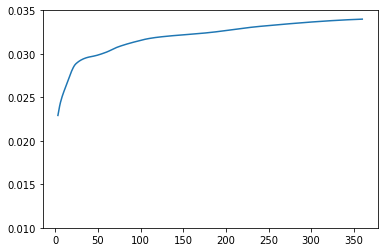

In [137]:
df_curve.iloc[-1].plot(ylim=[0.01, 0.035])